# Ford Go Bike Data Exploration
## by Touiti MARIE-BORNAND

## Preliminary Wrangling

This document explores a dataset containing trip data and user characteristics for approximately 520,000 bike trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
trips = pd.read_csv('2017-fordgobike-tripdata.csv')
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
# high-level overview of data shape and composition
print(trips.shape)
print(trips.dtypes)

(519700, 15)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object


In [4]:
# convert start_time and end_time into datetime datadype
trips.start_time = pd.to_datetime(trips.start_time)
trips.end_time = pd.to_datetime(trips.end_time)

In [6]:
#descriptive statistics for quantitative variables
print(trips.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.00000

### What is the structure of your dataset?

* There are 519,700 bike trips in the dataset with 15 characteristics. 
* Most variables are numeric, but we note that the ids (`start_station_id`, `end_station_id`, `bike_id`) and the geographic coordinates (`start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`) should be treated as categorical nominal data because in reality we cannot perform mathematical operations with them and they are pure labels without inherent order. 
* Bike users are described with three variables: their age (`member_birth_year`), and if they can be categorised as customer/subscriber (`user_type`) or male/female (`member_gender`).

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in finding the answers to these three questions: 
* What is the most popular bike trip?
* Does the people that use this bike sharing service share similar characteristics?
* Are there relationships between the bike user and his trip?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since I don't live in San Francisco, I have no idea what will be the most popular bike trip. However, I expect the users to be mostly male and below thirty years old. I'm sceptical whether there is any relationship between user characteristics and bike trip details.

## Univariate Exploration
We can break down the variables of the dataset into two groups: trip characteristics and user details.

### Trip characteristics
Firstly we explore each variable related to the bike journey: `start/end_station`, `start/end_time` and `duration_sec`.  

Each station has a unique name, id and set of geographic coordinates (longitude/latitude). Consequently, we can focus on one of these variables instead of all to explore which stations are most used. These variables are qualitative in nature so we can use a bar chart to depict the frequency of stations used.

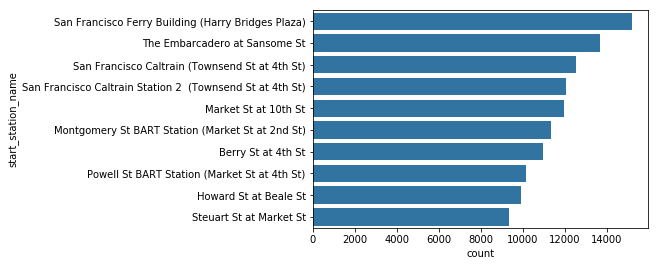

In [7]:
# create a bar chart with absolute frequency for start_station_name focusing on the 10 stations most used 
base_color = sb.color_palette()[0]
cat_order = trips['start_station_name'].value_counts().nlargest(10).index
sb.countplot(data = trips, y = 'start_station_name', color = base_color, order = cat_order);

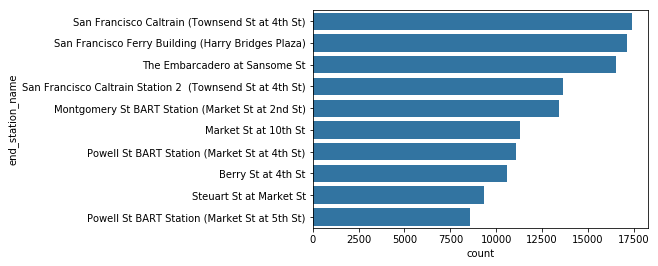

In [8]:
# create a bar chart with absolute frequency for end_station_name focusing on the 10 stations most used 
cat_order = trips['end_station_name'].value_counts().nlargest(10).index
sb.countplot(data = trips, y = 'end_station_name', color = base_color, order = cat_order);

Now we know which are the 10 most used stations (among a total of 272) by the customers of the bike sharing service. More than 7,500 bike trips have gone through each one of them. Unsurprisingly, the 10 most used start stations are also the 10 most used end stations, suggesting that most bike trips took place between these popular stations.

To have an idea of how much these stations were used compared to the overall traffic, we create bar charts with relative frequency.

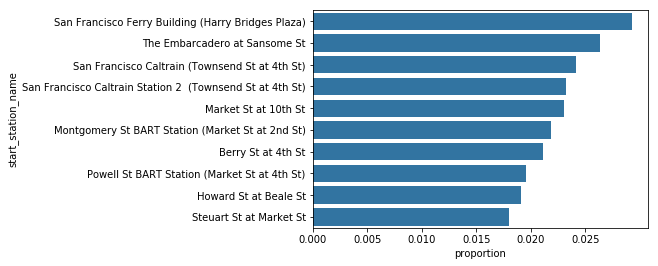

In [9]:
# create a bar chart with relative frequency for start_station_name focusing on the 10 stations most used 

# get proportion taken by most common group for derivation of tick marks
n_points = trips.shape[0]
max_count = trips['start_station_name'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.005)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

# create the plot
cat_order = trips['start_station_name'].value_counts().nlargest(10).index
sb.countplot(data = trips, y = 'start_station_name', color = base_color, order = cat_order)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion');

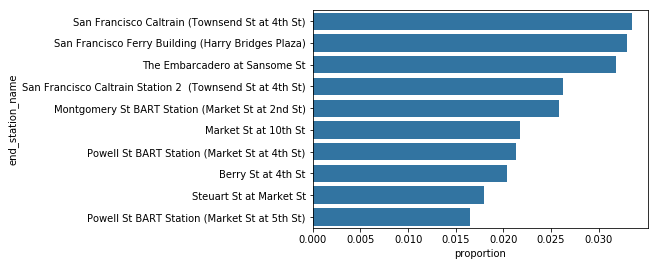

In [10]:
# create a bar chart with relative frequency for end_station_name focusing on the 10 stations most used 

# get proportion taken by most common group for derivation of tick marks
n_points = trips.shape[0]
max_count = trips['end_station_name'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.005)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
cat_order = trips['end_station_name'].value_counts().nlargest(10).index
sb.countplot(data = trips, y = 'end_station_name', color = base_color, order = cat_order)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion');

The proportion of the overall traffic that went through each one of the 10 most popular stations goes from 1.5% to 3.5% approximately.

Now we turn our attention to the start/end time to know when customers are most likely to use the service. Since the start/end time variables are qualitative, we also use bar charts to have an idea of when most of the traffic takes place.

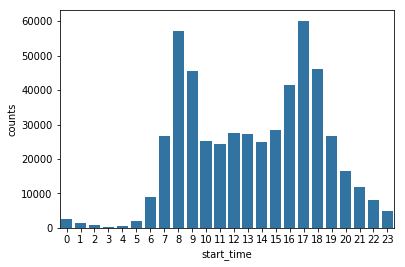

In [11]:
# group the trips dataframe by hour in the start_time column, make a count and turn it into a dataframe called start_hours
start_hours = trips.groupby(trips.start_time.dt.hour).size().reset_index(name='counts')
# create a bar chart 
sb.barplot(data = start_hours, x = 'start_time', y = 'counts', color = base_color);

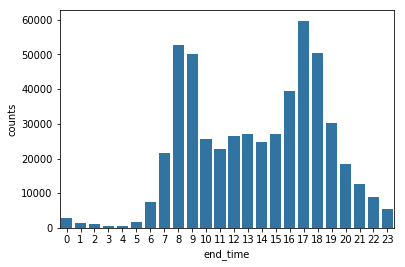

In [12]:
# group the trips dataframe by hour in the end_time column, make a count and turn it into a dataframe called end_hours
end_hours = trips.groupby(trips.end_time.dt.hour).size().reset_index(name='counts')
# create a bar chart 
sb.barplot(data = end_hours, x = 'end_time', y = 'counts', color = base_color);

After grouping the bike trips according to the hour of the day, we can clearly see a pattern: peak activity at 8-9am and 5-6pm when clients are most likely cycling to work and to home, with more than 50,000 bike trips each hour.

We now turn to the last trip characteristic, duration, which is quantitative. Consequently we will use a histogram to see what does the distribution of duration look like.

In [13]:
# check descriptive stastistics 
trips.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

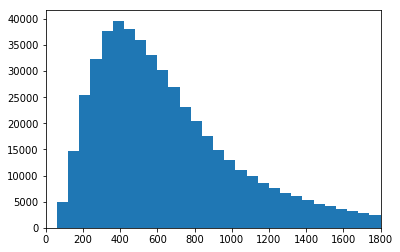

In [14]:
# there is a very long tail of trip durations. Here I focus in on trips with a duration below 30 minutes (1800 seconds)
# so that I can use a smaller bin size to get a more detailed look at the main data distribution.
bin_edges = np.arange(0, trips.duration_sec.max()+1, 60)
plt.hist(data = trips, x = 'duration_sec', bins = bin_edges)
plt.xlim((0,1800));

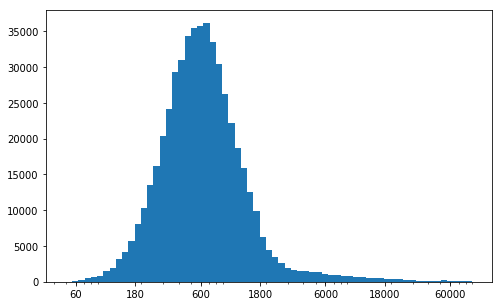

In [15]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(1.7, np.log10(trips['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([60, 180, 600, 1800, 6000, 18000, 60000], [60, 180, 600, 1800, 6000, 18000, 60000])
plt.show()

Duration has a long-tailed distribution, with lots of short trips and a few long trips. When plotted on a log-scale, the distribution looks unimodal with a peak around 600 seconds (10 minutes). Most of the trips last between 180 and 1800 seconds (3 and 30 minutes, respectively).

### User details
In this part, we are turning our attention to the variables that gives us information about the users: `user_type`, `member_gender` and `member_birth_year`.

Both the type (customer or subscriber) and gender (male or female) of the users are categorical variables. As a result, we create pie charts for both variables in order to show how the users are broken down into these categories. 

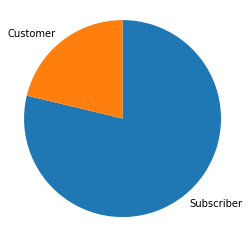

In [16]:
# create a pie chart with the counts in the user_type column 
sorted_counts_type = trips['user_type'].value_counts()
plt.pie(sorted_counts_type, labels = sorted_counts_type.index, startangle = 90, counterclock = False)
plt.axis('square');

In [17]:
sorted_counts_type

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

The majority of the clients are subscribers (79%) while the rest are customers (21%).

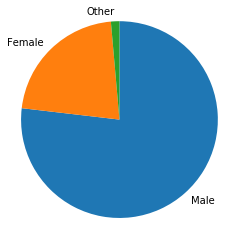

In [18]:
# create a pie chart with the counts in the member_gender column 
sorted_counts_gender = trips['member_gender'].value_counts()
plt.pie(sorted_counts_gender, labels = sorted_counts_gender.index, startangle = 90, counterclock = False)
plt.axis('square');

In [19]:
sorted_counts_gender

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

The majority of the clients are male (77%), only 22% are female and 1% identify themselves as "other".

We will finish the univariate exploration of user details by visualizing the age of the customers. We have their date of birth so we can deduce their age and since age is a quantitative variable, we plot a histogram.

In [20]:
# create a column called member_age 
trips['member_age'] = 2019 - trips['member_birth_year']

# check descriptive stastistics 
trips.member_age.describe()

count    453159.000000
mean         38.595213
std          10.513488
min          20.000000
25%          31.000000
50%          36.000000
75%          45.000000
max         133.000000
Name: member_age, dtype: float64

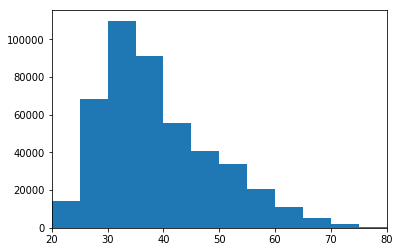

In [21]:
# there is a long tail of user ages. Here I focus in on users with an age below 45 years old
# so that I can use a smaller bin size to get a more detailed look at the main data distribution.
bin_edges = np.arange(20, trips['member_age'].max()+1, 5)
plt.hist(data = trips, x = trips.member_age.dropna(), bins = bin_edges);
plt.xlim((20,80));

The typical user of the bike sharing service has between 30 and 40 years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between at 600 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To build the histogram for user age, I had to create a column where I calculated the age given the birth year. Also, I dropped out the null values to avoid a ValueError. The distribution of user age is right-skewed with a long tail, but we did not need to perform a log transform to visualize the age of the typical bike user.

## Bivariate Exploration
In our first bivariate visualization, we want to explore the relationship between two numeric variables, the duration of the bike trip and the age of the cyclist. As a result, we will build a scatterplot.

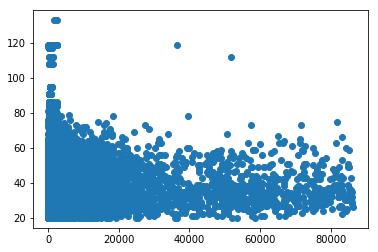

In [22]:
# create scatterplot 
plt.scatter(data = trips, x = 'duration_sec', y = 'member_age');

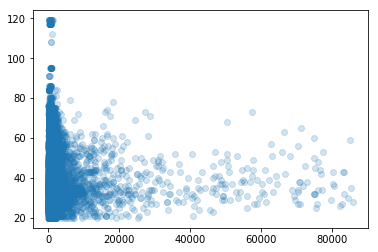

In [23]:
# since there are lots of data points, we use sampling and transparency to visualize better the data
samples = np.random.choice(trips.shape[0], 100000, replace = False)
trips_samp = trips.loc[samples,:]
plt.scatter(data = trips_samp, x = 'duration_sec', y = 'member_age', alpha = 1/5);

We can observe that a lot of the data points are concentrated in the bottom left part of the scatterplot: most of the users are below 40 years old and cycle for less than 20000 seconds. We also note a negative relationship between age and duration: younger users make the longest trips and as the age of the customers increases, the trips get shorter in duration.

In our second bivariate visualization, we explore the relationships between duration (quantitative variable) and type/gender (qualitative variables). We would like to see a set of descriptive statistics for the numeric values on each categorical level, hence boxplots are appropriate.

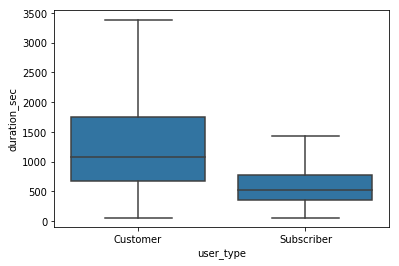

In [24]:
# create boxplots for duration/type hiding outliers (more than 1.5 times the IQR)
sb.boxplot(data = trips, x = 'user_type', y = 'duration_sec', color = base_color, showfliers = False);

Since the duration distribution has very long tails, we decided not to show the outliers (all values that are more or less than 1.5 times the interquartile range in seaborn). It turns out the customers and subscribers have very different trip characteristics. The customer category has a median trip duration of roughly 1000 seconds and an interquartile range of 1000 seconds. The subscriber category have much shorter trips and the overall distribution is concentrated within a smaller range: median of approximately 500 seconds and interquartile range of 500 seconds.

In our third and last bivariate visualization, we want to observe the relationship between two categorical variables: user type and gender. As a result, we will use clustered bar charts.

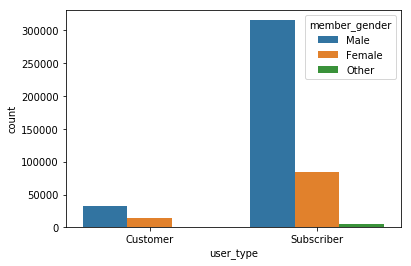

In [25]:
# create a clustered bar chart with user_type and member_gender
sb.countplot(data = trips, x = 'user_type', hue = 'member_gender');

We can see that the number of bike trips done by subscribers is a way more bigger than the number of trips by customers. In addition, the users of the bike sharing service are predominantly male. If we look at the subscriber category only, more than 300,000 trips were done by males against less than 100,000 trips by females.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Here the feature of interest was the duration of the trips. I have discovered that it has a negative relationship with age: the older you are, the shorter your bike trips are likely to be. There was also an interesting relationship between duration and user type. Subscribers make shorter trips than customers, and the majority of these trips are regrouped in a narrow range of duration around 500 seconds.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Another relationship I found out was between the type and gender of the customers. It turns out most of the bike trips are done by male subscribers.

## Multivariate Exploration
The main thing I want to explore in this part of the analysis is how the three user details (age, gender and user type) play into the relationship with one trip characteristic: duration.

In the first visualization, I build a scatterplot with duration and user age and encode the user type with color.

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


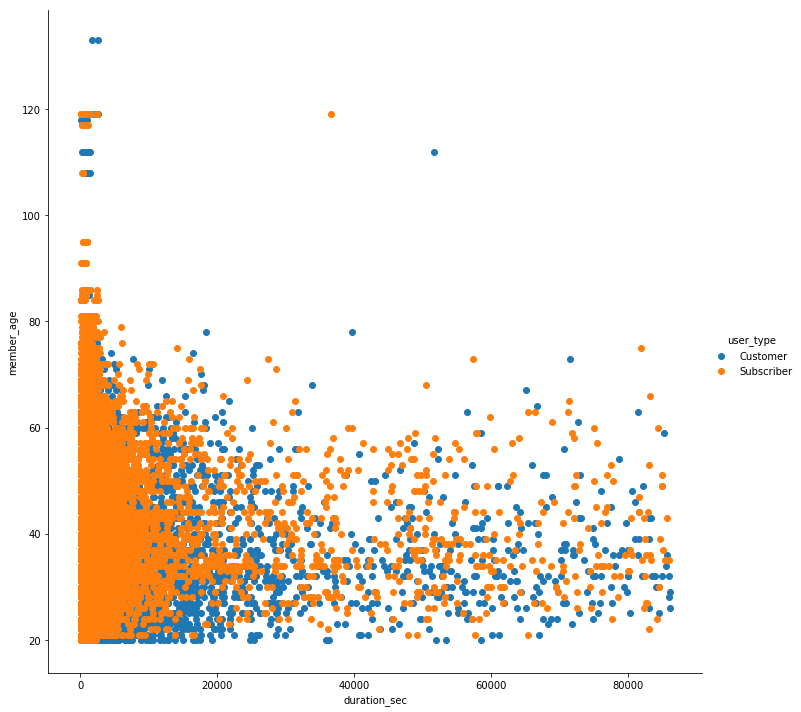

In [26]:
# create the same scatterplot as before but encoding the user type with color
g = sb.FacetGrid(data = trips, hue = 'user_type', size = 10)
g.map(plt.scatter, 'duration_sec', 'member_age')
g.add_legend();

The pattern of trip duration according to the age does not differ depending on the type of the user. Whether they are a subscriber or a customer, younger users make the longest trips and as the age of the customers increases, the trips get shorter in duration.

In our final visualization, I want to study the same relationship as before but the categorical variable will be the gender instead of the user type.

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


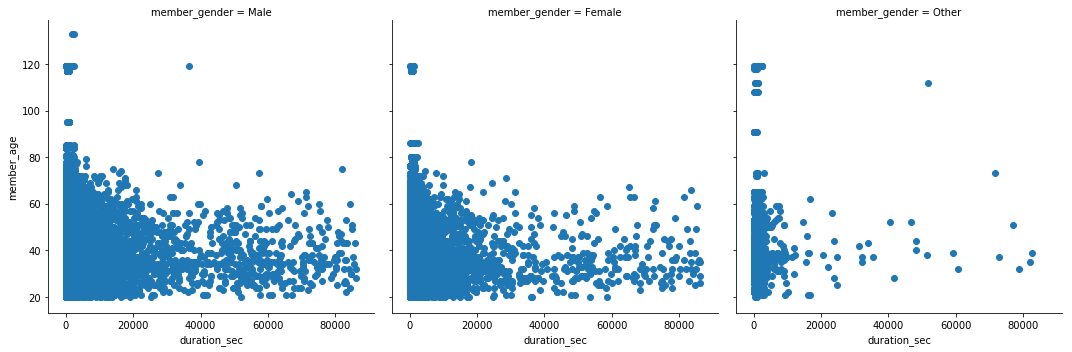

In [27]:
# create scatterplots for age and duration, faceting with gender
g = sb.FacetGrid(data = trips, col = 'member_gender', size = 5)
g.map(plt.scatter, 'duration_sec', 'member_age');

The pattern of trip duration according to the age does not differ depending on the gender. Whether they are male or female, younger users make the longest trips and as the age of the customers increases, the trips get shorter in duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The negative relationship between age and duration that I observed in the bivariate visualization part has been confirmed. Even when we added another categorical variable to the visualization (first user type encoded with color then faceting with gender), the negative relationship remained unaltered.